In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [7]:
df = tf.keras.datasets.cifar10

In [8]:

(train_images, train_labels), (test_images, test_labels) = df.load_data()

170500096/170498071 [==============================] - 268s 2us/step


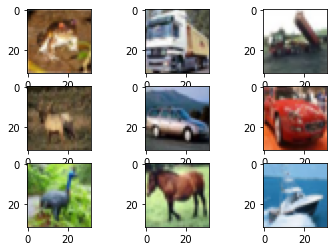

In [13]:
for i in range(0,9):
  plt.subplot(330+1+i)
  plt.imshow(train_images[i])

In [17]:
train_images = train_images.reshape(train_images.shape[0], 32,32,3)
test_images = test_images.reshape(test_images.shape[0], 32,32,3)

In [18]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(32,32,3)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history = model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3028 - accuracy: 0.0977
Epoch 2/25
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3027 - accuracy: 0.0982
Epoch 3/25
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3027 - accuracy: 0.1005
Epoch 4/25
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3027 - accuracy: 0.0991
Epoch 5/25
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3027 - accuracy: 0.0994
Epoch 6/25
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.0976
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3028 - accuracy: 0.0968
Epoch 8/25
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3027 - accuracy: 0.0984
Epoch 9/25
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3027 - accuracy: 0.1004
Epoch 10/25
1563/1563 [==============================] - 6s 4ms/step - loss: 2.302

In [24]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.1000


[2.302729368209839, 0.10000000149011612]

Text(0, 0.5, 'loss')

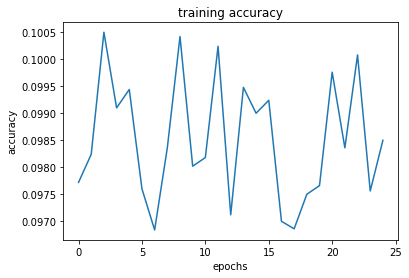

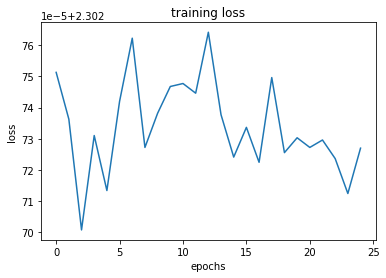

In [26]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.title('training accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.title('training loss')
plt.xlabel('epochs')
plt.ylabel('loss')

In [28]:
pred = model.predict(test_images)
pred = [np.argmax(x) for x in pred]

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.10      1.00      0.18      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



In [29]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
cmr = confusion_matrix(test_labels,pred)
print(cmr)

[[   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   1    0  999    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]]


In [30]:
cnn_model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(216, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [31]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)        

In [32]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
cnn_history = cnn_model.fit(train_images, train_labels, epochs=20, validation_split=0.2, callbacks = tf.keras.callbacks.EarlyStopping())

Epoch 1/20
1250/1250 [==============================] - 45s 36ms/step - loss: 2.0829 - accuracy: 0.3250 - val_loss: 1.6227 - val_accuracy: 0.4197
Epoch 2/20
1250/1250 [==============================] - 43s 35ms/step - loss: 1.5143 - accuracy: 0.4497 - val_loss: 1.3777 - val_accuracy: 0.5165
Epoch 3/20
1250/1250 [==============================] - 44s 35ms/step - loss: 1.3874 - accuracy: 0.5017 - val_loss: 1.2712 - val_accuracy: 0.5521
Epoch 4/20
1250/1250 [==============================] - 42s 34ms/step - loss: 1.3056 - accuracy: 0.5342 - val_loss: 1.2192 - val_accuracy: 0.5827
Epoch 5/20
1250/1250 [==============================] - 42s 34ms/step - loss: 1.2375 - accuracy: 0.5661 - val_loss: 1.1610 - val_accuracy: 0.5996
Epoch 6/20
1250/1250 [==============================] - 43s 34ms/step - loss: 1.1917 - accuracy: 0.5824 - val_loss: 1.1274 - val_accuracy: 0.6102
Epoch 7/20
1250/1250 [==============================] - 40s 32ms/step - loss: 1.1558 - accuracy: 0.5954 - val_loss: 1.1073 -

In [34]:
cnn_model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 1.0513 - accuracy: 0.6446


[1.051311731338501, 0.644599974155426]

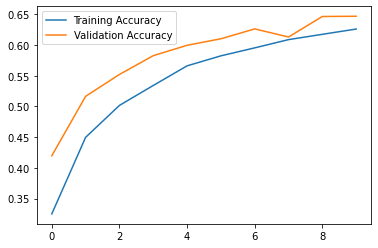

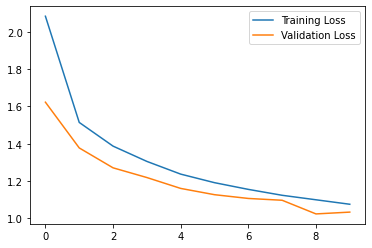

In [35]:
cnn_acc = cnn_history.history['accuracy']
cnn_loss = cnn_history.history['loss']
cnn_val_acc = cnn_history.history['val_accuracy']
cnn_val_loss = cnn_history.history['val_loss']

cnn_epochs = range(len(cnn_acc))

plt.plot(cnn_epochs, cnn_acc, label='Training Accuracy')
plt.plot(cnn_epochs, cnn_val_acc, label='Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(cnn_epochs, cnn_loss, label='Training Loss')
plt.plot(cnn_epochs, cnn_val_loss, label='Validation Loss')
plt.legend()

In [36]:
import numpy as np
p = cnn_model.predict(test_images)
p = [np.argmax(x) for x in p]

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,p))


              precision    recall  f1-score   support

           0       0.77      0.61      0.68      1000
           1       0.74      0.85      0.79      1000
           2       0.54      0.49      0.51      1000
           3       0.53      0.29      0.38      1000
           4       0.46      0.75      0.57      1000
           5       0.68      0.42      0.52      1000
           6       0.60      0.83      0.70      1000
           7       0.78      0.62      0.69      1000
           8       0.81      0.74      0.77      1000
           9       0.66      0.82      0.73      1000

    accuracy                           0.64     10000
   macro avg       0.66      0.64      0.64     10000
weighted avg       0.66      0.64      0.64     10000



In [38]:
labels =['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
cmat=confusion_matrix(test_labels,p)
print(cmat)

[[613  55 105   9  52   3  19   8  73  63]
 [ 14 853   3   1   6   1  19   1   9  93]
 [ 48   8 488  37 207  35 110  20  23  24]
 [ 15  22  80 293 207 100 180  36  15  52]
 [ 17   6  46  17 753   6  76  46  14  19]
 [ 10  11  81 138 155 425  82  55  11  32]
 [  1  10  35  21  63   8 834   5  10  13]
 [  8   8  39  27 147  42  29 625   3  72]
 [ 58  77  18   9  20   1  20   2 744  51]
 [ 11 110   9   1  12   2  14   4  19 818]]


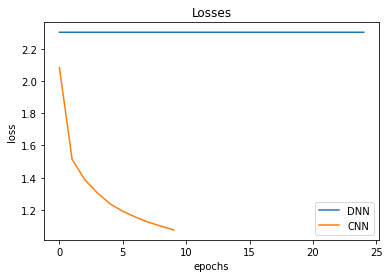

In [39]:
plt.plot(loss, label='DNN')
plt.plot(cnn_loss, label='CNN')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()